# Data Modelling - Student Grade Prediction

### Group Members
#### Wahaj Raza CS-21055
#### Farrukh Niaz CS-21064
#### Huzaifa Naseer Khan CS-21067

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Understanding the Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Cleaning</a>

<a href=#six>6. Model Training</a>

<a href=#seven>7. Model Evaluation and Performance Analysis</a>

<a href=#eight>8. Model Explanation</a>

<a href=#nine>9. Model From Scratch</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, we import the necessary libraries for our analysis and modeling. |

---

In [175]:
# General Libraries
import os
import warnings
from collections import Counter
from datetime import datetime

# Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configure Display Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

# Ignore Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action="ignore")

# Plot Styling and Configurations
sns.set(style='white', context='notebook', palette='deep')
plt.style.use('fivethirtyeight')
params = {
    'legend.fontsize': '16',
    'figure.figsize': (15, 5),
    'axes.labelsize': '20',
    'axes.titlesize': '30',
    'xtick.labelsize': '15',
    'ytick.labelsize': '15'
}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

# Jupyter Notebook Settings
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Machine Learning Libraries
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold, KFold, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import (
    precision_score, recall_score, f1_score, log_loss, accuracy_score, 
    classification_report, confusion_matrix, cohen_kappa_score
)
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
    ExtraTreesClassifier, VotingClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import TomekLinks

# External Libraries
from xgboost import XGBClassifier
from vecstack import stacking

# Statistical Libraries
from scipy.stats import skew, norm, boxcox_normmax
from scipy.special import boxcox1p

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section We are loading the data from the csv file into a DataFrame. |

---

### Loading and Previewing Data

The code below reads data from a CSV file named `Data.csv` into a pandas DataFrame and displays the first five rows of the DataFrame. This helps in understanding the structure and content of the dataset.

In [176]:
# Read data from the CSV file into a DataFrame
df = pd.read_csv('Data.csv')

# Display the first five rows of the DataFrame
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


<a id="three"></a>
## 3. Understanding The Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Understanding The Data ⚡ |
| :--------------------------- |
| In this section, We will understand the data superficially |

---

### Inspecting the DataFrame

The code below provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, data types, and memory usage. This helps in understanding the structure and metadata of the dataset.

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  int64 
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  object
 5   Main Administration  38930 non-null  object
 6   Candidacy type       38930 non-null  object
 7   Degree               38930 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.4+ MB


### Selecting Numerical and Categorical Columns

The code below identifies and lists the numerical and categorical columns in the DataFrame. This helps in distinguishing between different data types for further analysis and preprocessing.

In [178]:
# numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

# categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['Class Level', 'Age', 'Degree']

['Gender',
 'Nationality',
 'School Type',
 'Main Administration',
 'Candidacy type']

### Visualizing Missing Values with Missingno

The code below generates a matrix plot using the `missingno` library to visualize missing values in the DataFrame `df`. This plot helps in identifying patterns of missing data across different columns.

<Axes: >

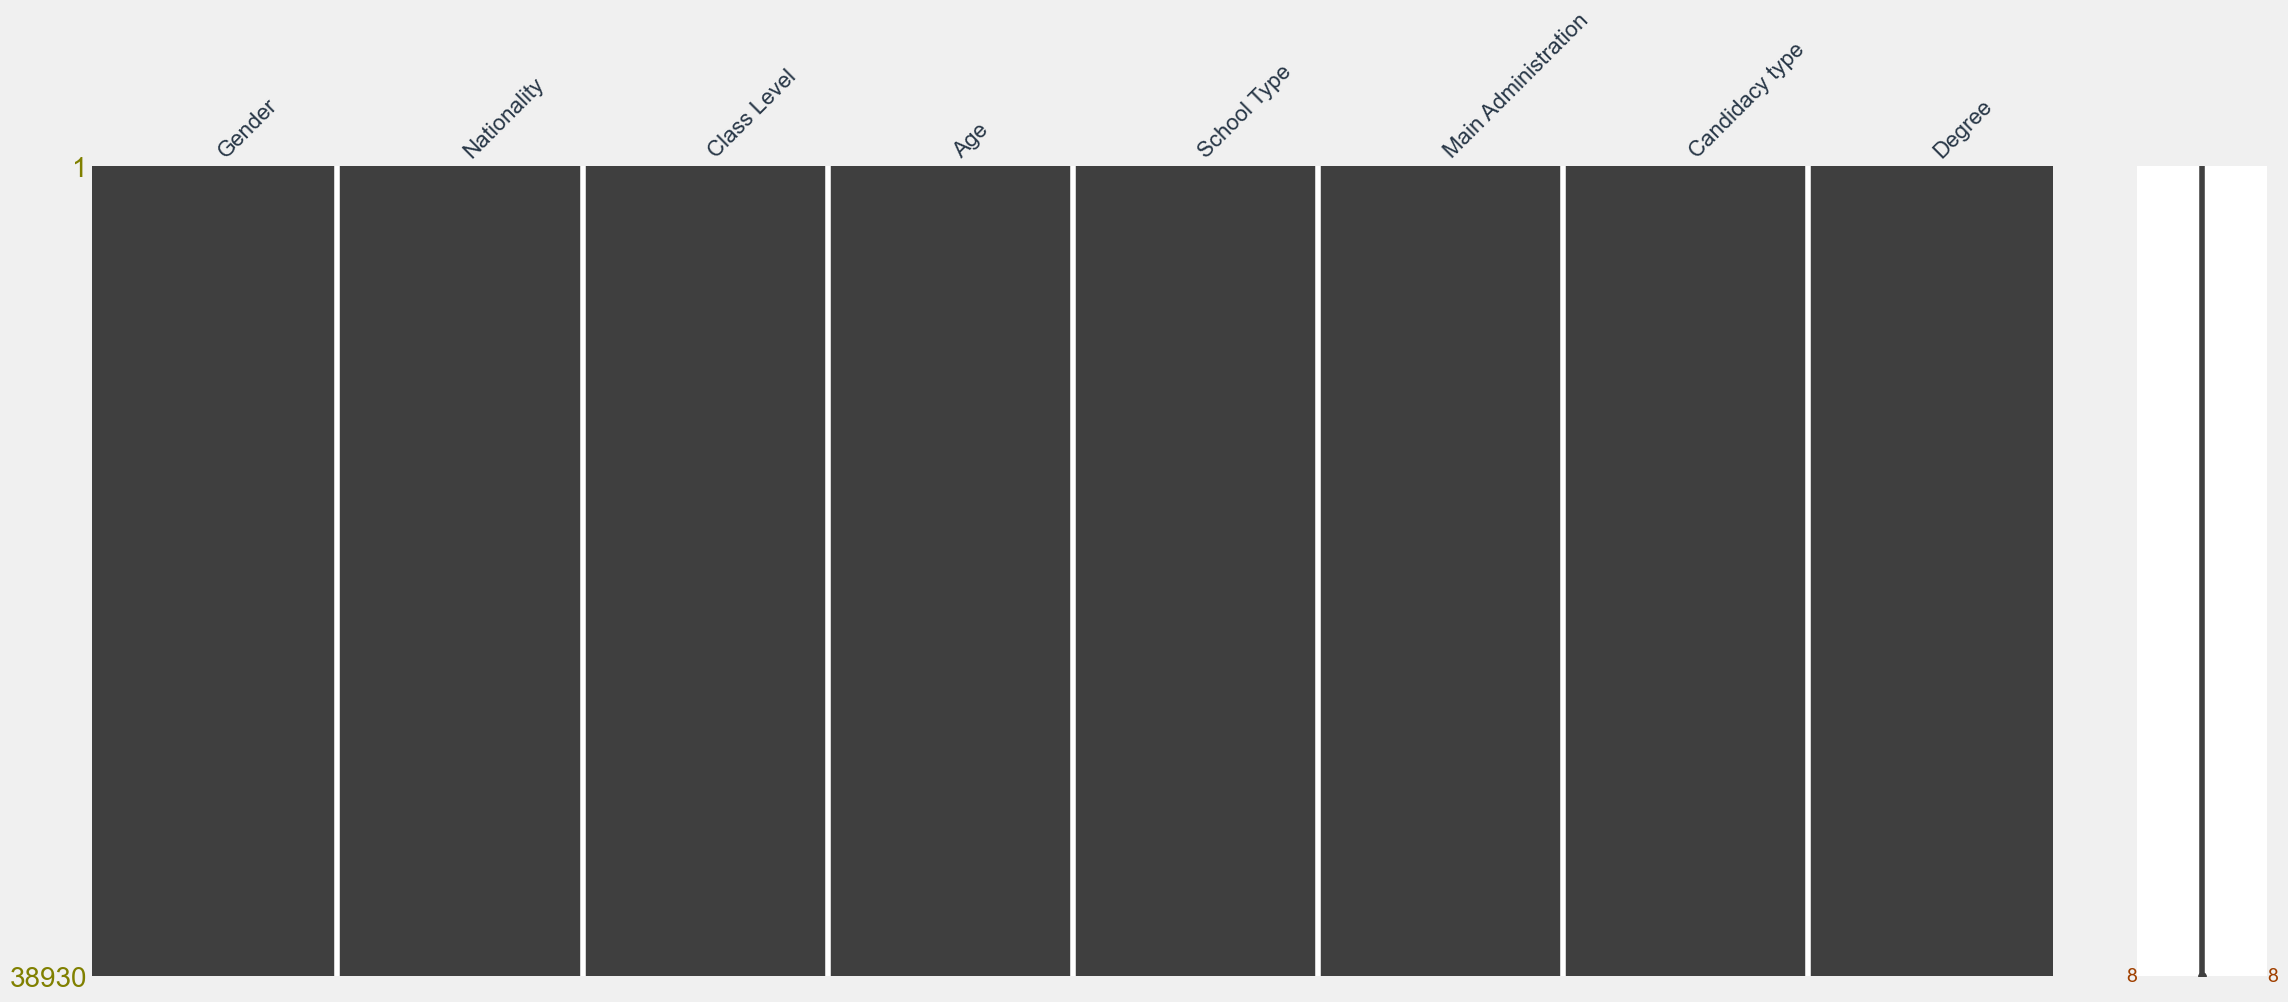

In [179]:
msno.matrix(df)
plt.show()

In [180]:
df.isna().sum()

Gender                 0
Nationality            0
Class Level            0
Age                    0
School Type            0
Main Administration    0
Candidacy type         0
Degree                 0
dtype: int64

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory Data Analysis (EDA) ⚡ |
| :--------------------------- |
| In this section, We will gain insights from data with the help of amazing visuals |

---

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Variables')

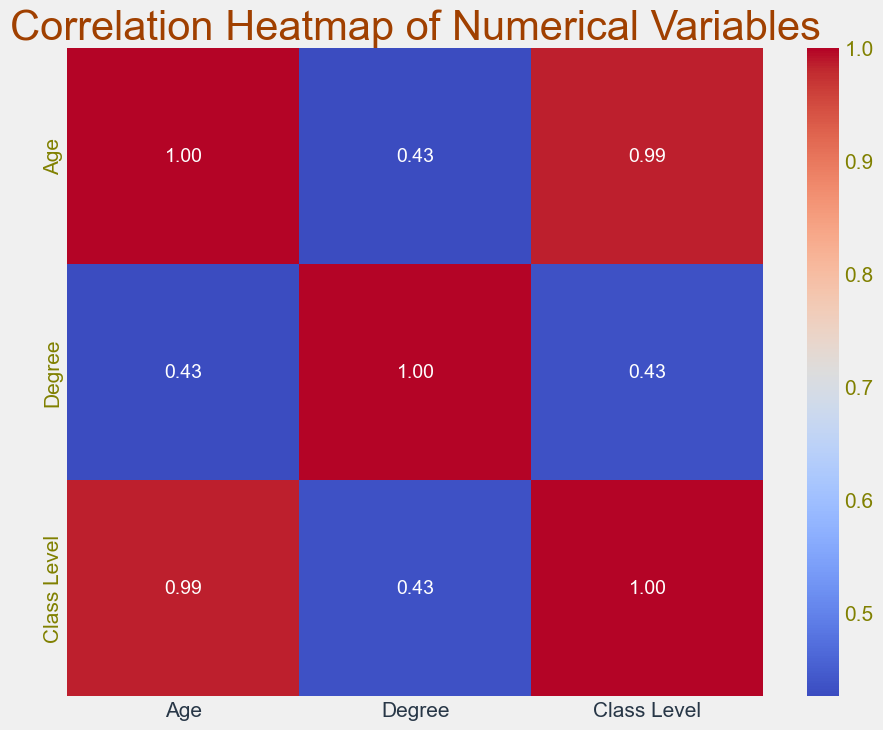

In [181]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Degree', 'Class Level']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### Deductions from the Correlation Matrix

1. **Age and Degree**:
   - **Correlation Coefficient**: 0.426
   - **Interpretation**: There is a moderate positive correlation (0.426) between 'Age' and 'Degree'.
   - **Implication**: Older individuals tend to have higher degrees, suggesting a trend towards higher education with increasing age.

2. **Age and Class Level**:
   - **Correlation Coefficient**: 0.986
   - **Interpretation**: There is a strong positive correlation (0.986) between 'Age' and 'Class Level'.
   - **Implication**: As age increases, class levels also tend to increase significantly. This indicates that older individuals are generally in higher academic class levels.

3. **Degree and Class Level**:
   - **Correlation Coefficient**: 0.435
   - **Interpretation**: There is a moderate positive correlation (0.435) between 'Degree' and 'Class Level'.
   - **Implication**: Higher academic class levels correspond moderately to higher degrees, suggesting a relationship between academic progress and educational attainment.


<Figure size 1500x600 with 0 Axes>

<Axes: >

<Axes: xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age')

<Axes: >

<Axes: xlabel='Degree', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Degree')

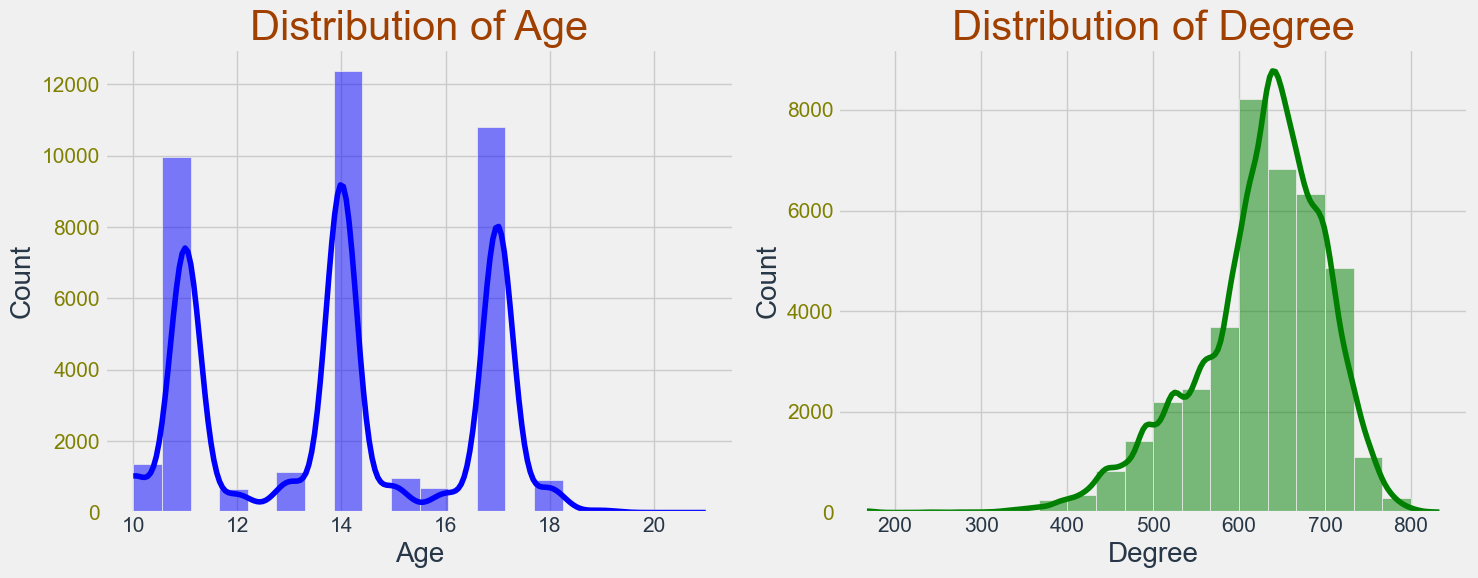

In [182]:
# Set up the figure size
plt.figure(figsize=(15, 6))

# Plot for Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')

# Plot for Degree distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Degree'], bins=20, kde=True, color='green')
plt.title('Distribution of Degree')

plt.tight_layout()
plt.show()


Text(0.5, 1.02, 'Scatter Plot Matrix for Age, Degree, and Class Level')

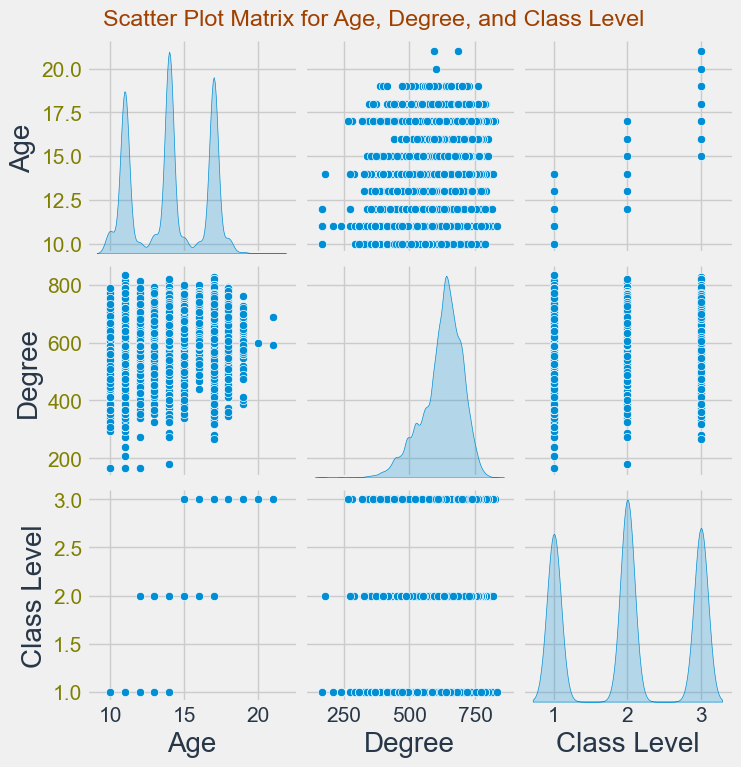

In [183]:
# Scatter plot matrix for Age, Degree, and Class Level
sns.pairplot(df[['Age', 'Degree', 'Class Level']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for Age, Degree, and Class Level', y=1.02)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Gender', ylabel='Degree'>

Text(0.5, 1.0, 'Degree Distribution by Gender')

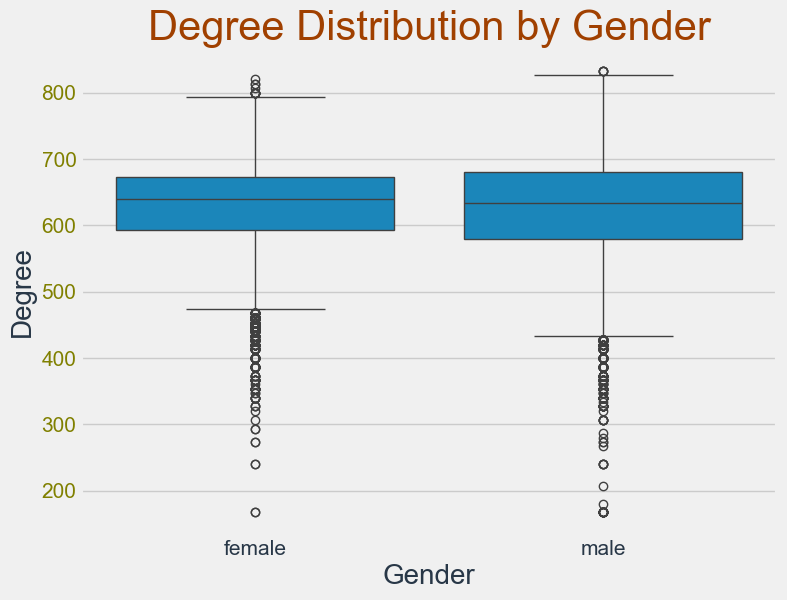

In [184]:
# Box plot of Degree by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Degree', data=df)
plt.title('Degree Distribution by Gender')
plt.show()

<Figure size 1500x600 with 0 Axes>

<Axes: >

<Axes: xlabel='Gender', ylabel='count'>

Text(0.5, 1.0, 'Count of Gender')

<Axes: >

<Axes: xlabel='Nationality', ylabel='count'>

Text(0.5, 1.0, 'Count of Nationality')

([0, 1], [Text(0, 0, 'Saudi'), Text(1, 0, 'Non-Saudi')])

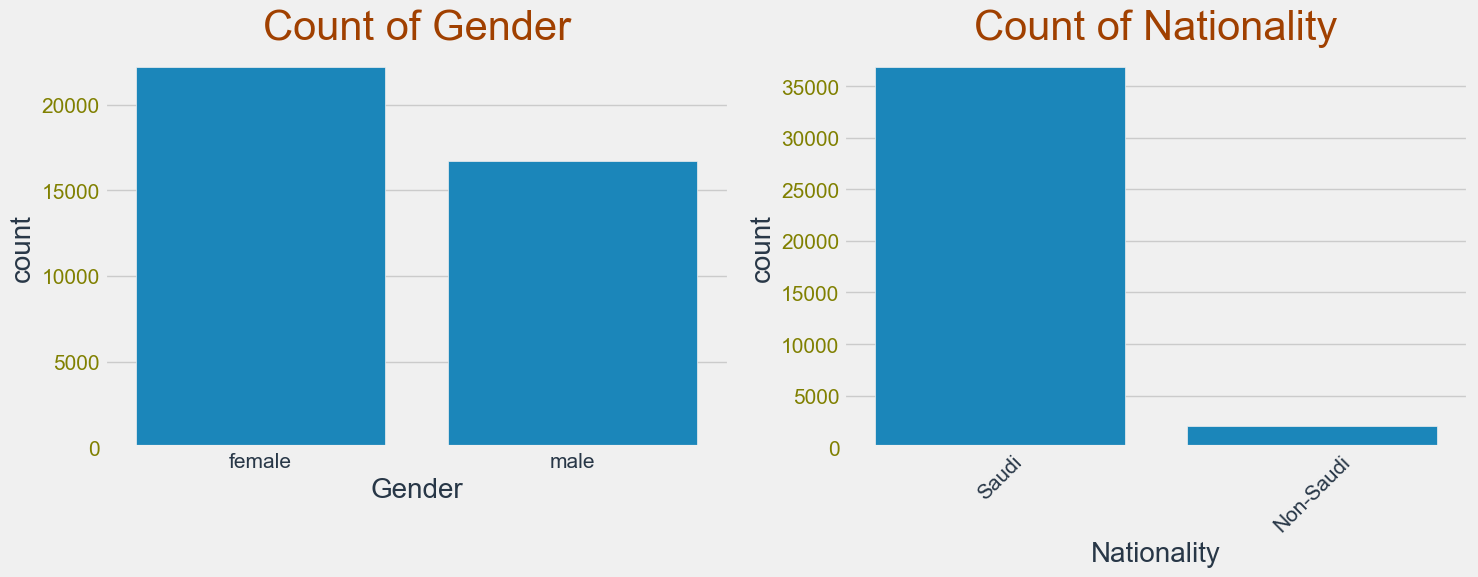

In [185]:
# Set up the figure size
plt.figure(figsize=(15, 6))

# Plot for Gender distribution
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')

# Plot for Nationality distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Nationality', data=df)
plt.title('Count of Nationality')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Nationality', ylabel='Degree'>

Text(0.5, 1.0, 'Degree Distribution Across Nationalities')

Text(0.5, 0, 'Nationality')

Text(0, 0.5, 'Degree')

([0, 1], [Text(0, 0, 'Non-Saudi'), Text(1, 0, 'Saudi')])

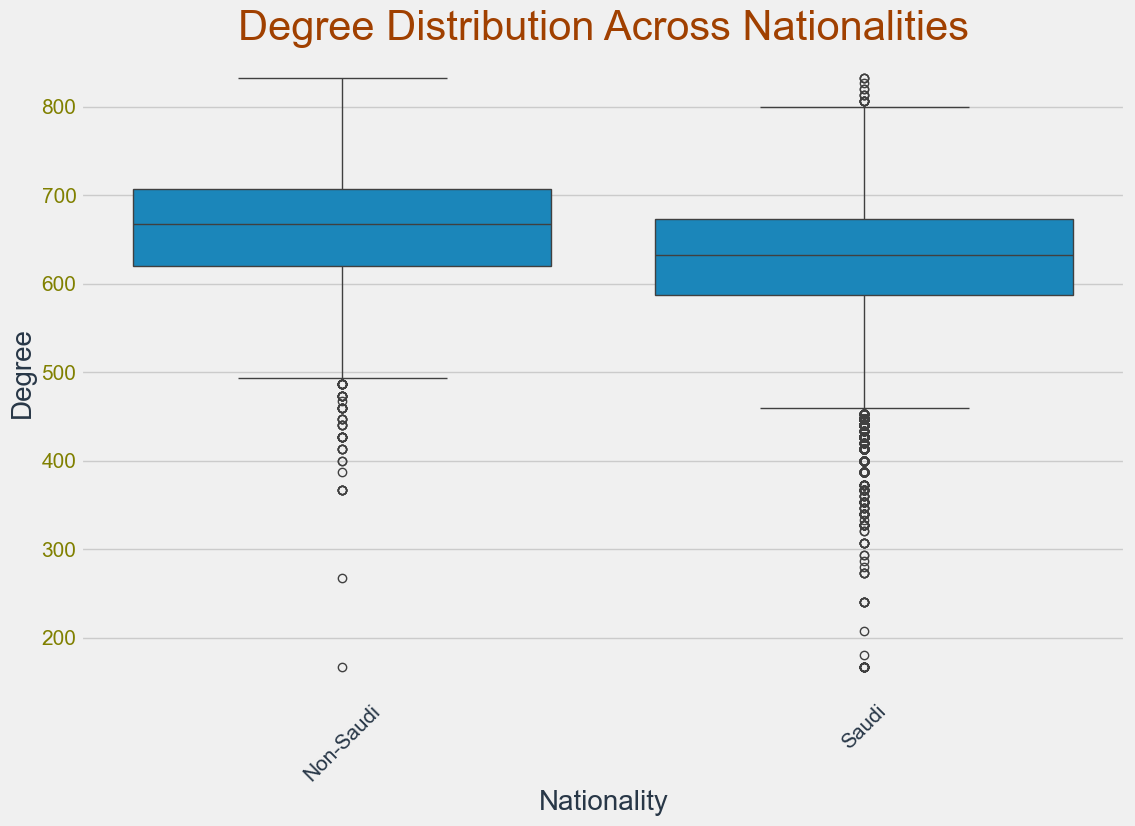

In [186]:
# Box plot of Degree by Nationality
plt.figure(figsize=(12, 8))
sns.boxplot(x='Nationality', y='Degree', data=df, order=df.groupby('Nationality')['Degree'].median().sort_values(ascending=False).index)
plt.title('Degree Distribution Across Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Degree')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Gender', ylabel='Degree'>

Text(0.5, 1.0, 'Mean Degree by Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Mean Degree')

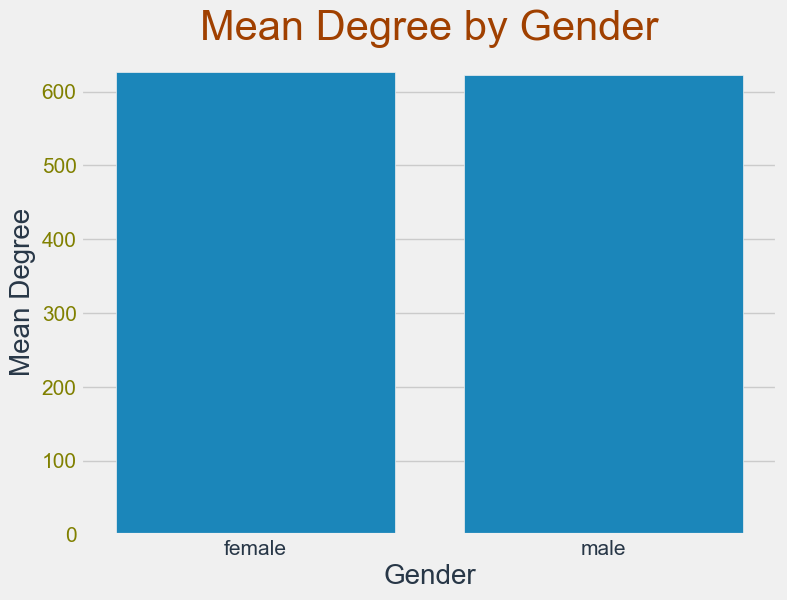

In [187]:
# Bar plot of Mean Degree by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Degree', data=df, estimator=np.mean, ci=None)
plt.title('Mean Degree by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Degree')
plt.show()


### Function to generate model report and plot auc_roc curve

In [188]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [189]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


<a id="five"></a>
## 5. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
| In this section We will clean the data, and will do feature extraction to get more features from existing features |

---

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  int64 
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  object
 5   Main Administration  38930 non-null  object
 6   Candidacy type       38930 non-null  object
 7   Degree               38930 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.4+ MB


In [191]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Degree
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,593
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,600
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,640
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,600
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,713


In [192]:
df['Degree'].describe()

count    38930.000000
mean       624.936476
std         76.615761
min        167.000000
25%        587.000000
50%        633.000000
75%        680.000000
max        833.000000
Name: Degree, dtype: float64

In [193]:
df['Pass/Fail'] = np.where(df['Degree'] >= 600, 1, 0)

In [194]:
df['Pass/Fail'].value_counts()

Pass/Fail
1    27656
0    11274
Name: count, dtype: int64

In [195]:
df = df.drop(['Degree'], axis = 1)

In [196]:
df.head()

,Gender,Nationality,Class Level,Age,School Type,Main Administration,Candidacy type,Pass/Fail
0,female,Saudi,3,21,Governmental,Riyadh,Self-Candidacy,0
1,male,Saudi,3,20,Governmental,Unknown,Self-Candidacy,1
2,female,Saudi,3,19,Governmental,Aseer,Self-Candidacy,1
3,male,Saudi,3,19,Governmental,Jazan,Self-Candidacy,1
4,female,Saudi,3,19,Governmental,Eastern,Talented-Candidacy,1


In [197]:
df['Class Level'] = df['Class Level'].astype('object')

In [198]:
df['School Type'].value_counts()

School Type
Governmental    29537
Private          8731
Foreign           662
Name: count, dtype: int64

In [199]:
lbe = LabelEncoder()
df['School Type'] = lbe.fit_transform(df['School Type'])

In [200]:
df['Main Administration'].value_counts()
df['Main Administration'] = lbe.fit_transform(df['Main Administration'])

Main Administration
Mecca                10526
Eastern               9364
Riyadh                5771
Aseer                 2931
Jazan                 2596
Madinah               2236
Qaseem                1910
Tabuk                  985
Bahah                  923
Jawf                   632
Hudud-Shimaliyyah      426
Hail                   339
Najran                 191
Unknown                100
Name: count, dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38930 entries, 0 to 38929
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               38930 non-null  object
 1   Nationality          38930 non-null  object
 2   Class Level          38930 non-null  object
 3   Age                  38930 non-null  int64 
 4   School Type          38930 non-null  int64 
 5   Main Administration  38930 non-null  int64 
 6   Candidacy type       38930 non-null  object
 7   Pass/Fail            38930 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.4+ MB


In [202]:
df = df.sample(frac = 1.0)

In [203]:
X = df.drop(['Pass/Fail'], axis = 1)
y = df['Pass/Fail']

In [204]:
X = pd.get_dummies(X)
X.head()

,Age,School Type,Main Administration,Gender_female,Gender_male,Nationality_Non-Saudi,Nationality_Saudi,Class Level_1,Class Level_2,Class Level_3,Candidacy type_Self-Candidacy,Candidacy type_Talented-Candidacy
2125,17,1,2,True,False,False,True,False,False,True,True,False
10187,17,1,11,True,False,False,True,False,False,True,False,True
19502,14,1,11,False,True,False,True,False,True,False,True,False
15548,14,1,6,False,True,False,True,False,True,False,True,False
5509,17,1,2,True,False,False,True,False,False,True,True,False


In [205]:
ss = MinMaxScaler(feature_range=(0,1))
X['Age'] = ss.fit_transform(np.array(X['Age']).reshape(-1, 1))

In [206]:
finalDF = pd.concat([X,y],axis = 1)
finalDF.to_csv('finalDf_v2.csv', index = False)

In [207]:
X

,Age,School Type,Main Administration,Gender_female,Gender_male,Nationality_Non-Saudi,Nationality_Saudi,Class Level_1,Class Level_2,Class Level_3,Candidacy type_Self-Candidacy,Candidacy type_Talented-Candidacy
2125,0.636364,1,2,True,False,False,True,False,False,True,True,False
10187,0.636364,1,11,True,False,False,True,False,False,True,False,True
19502,0.363636,1,11,False,True,False,True,False,True,False,True,False
15548,0.363636,1,6,False,True,False,True,False,True,False,True,False
5509,0.636364,1,2,True,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
32670,0.090909,1,7,True,False,False,True,True,False,False,False,True
6610,0.636364,1,8,True,False,False,True,False,False,True,False,True
25038,0.272727,1,11,True,False,False,True,False,True,False,True,False
19609,0.363636,1,2,False,True,False,True,False,True,False,True,False


<a id="six"></a>
## 6. Modelling/ Model Training 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Model Training  ⚡ |
| :--------------------------- |
|  This section of the code focuses on training and selecting the best-performing machine learning model on given dataset. It involves the preparation of data, model initialization, training, and evaluation to identify the optimal model|

---

## Define helper functions

In [208]:
class_names = ['Fail', 'Pass']

def evaluate_model(data_x, data_y):
    k_fold = KFold(5, shuffle=True, random_state=123)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        clf = RandomForestClassifier(criterion='entropy',max_depth=20,max_features='auto',n_estimators=100)
        # Fit the classifier
        classifier = clf.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets


def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize = (17,10))
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure(figsize = (17,10))
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
    
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return cnf_matrix

### Split into train and Test

In [209]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [210]:

smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

smt = SMOTEENN(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

## Modelling

LogisticRegression


LogisticRegression(class_weight={0: 1.5, 1: 1})


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      3378
           1       0.88      0.85      0.86      8301

    accuracy                           0.81     11679
   macro avg       0.77      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 confussion matrix:
 [[2385  993]
 [1224 7077]]




<Axes: >

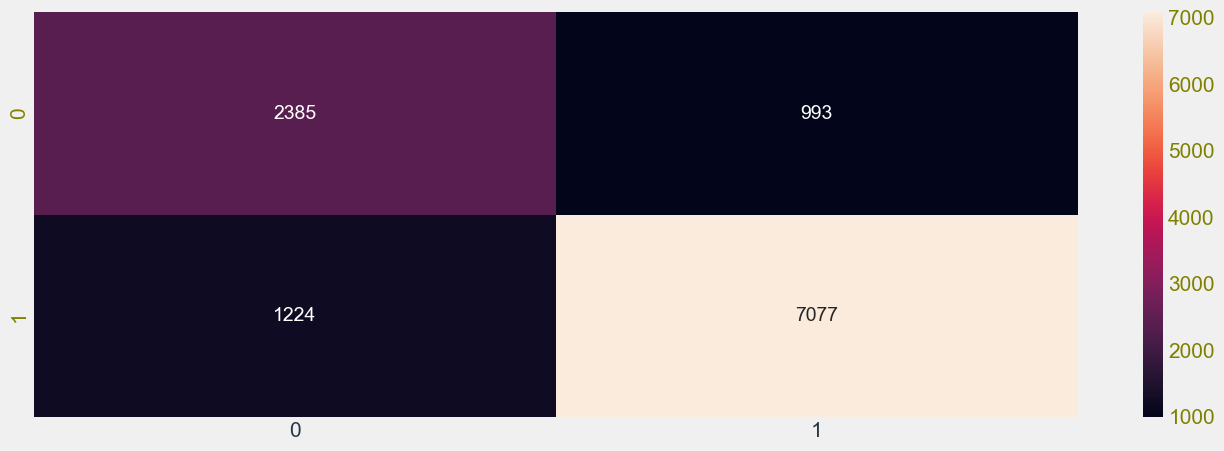

Naive Bayes


GaussianNB()


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      3378
           1       0.88      0.85      0.86      8301

    accuracy                           0.81     11679
   macro avg       0.77      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 confussion matrix:
 [[2385  993]
 [1224 7077]]




<Axes: >

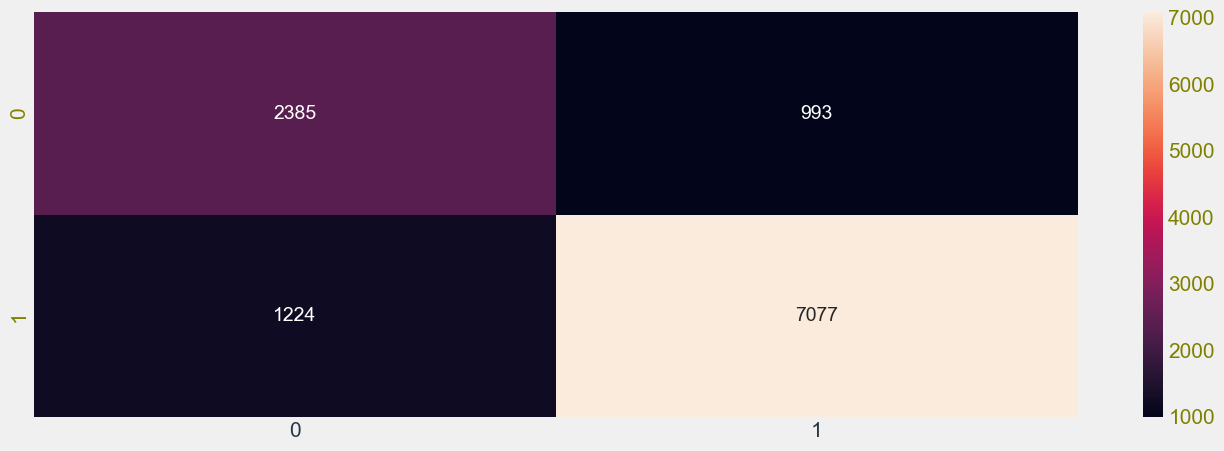

Decision Tree


DecisionTreeClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.68      0.61      0.64      3378
           1       0.85      0.88      0.86      8301

    accuracy                           0.80     11679
   macro avg       0.76      0.74      0.75     11679
weighted avg       0.80      0.80      0.80     11679


 confussion matrix:
 [[2056 1322]
 [ 986 7315]]




<Axes: >

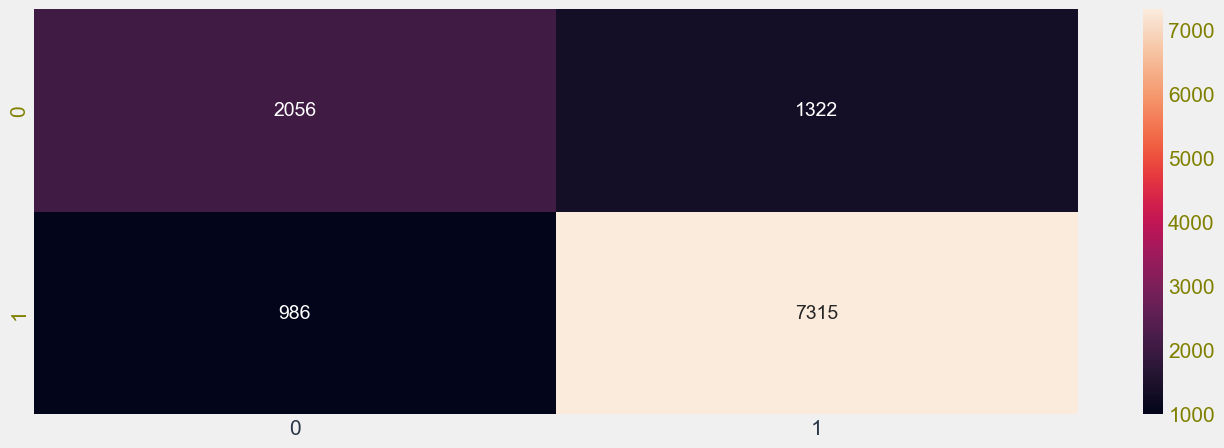

Random Forest


RandomForestClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      3378
           1       0.86      0.86      0.86      8301

    accuracy                           0.80     11679
   macro avg       0.76      0.76      0.76     11679
weighted avg       0.80      0.80      0.80     11679


 confussion matrix:
 [[2234 1144]
 [1137 7164]]




<Axes: >

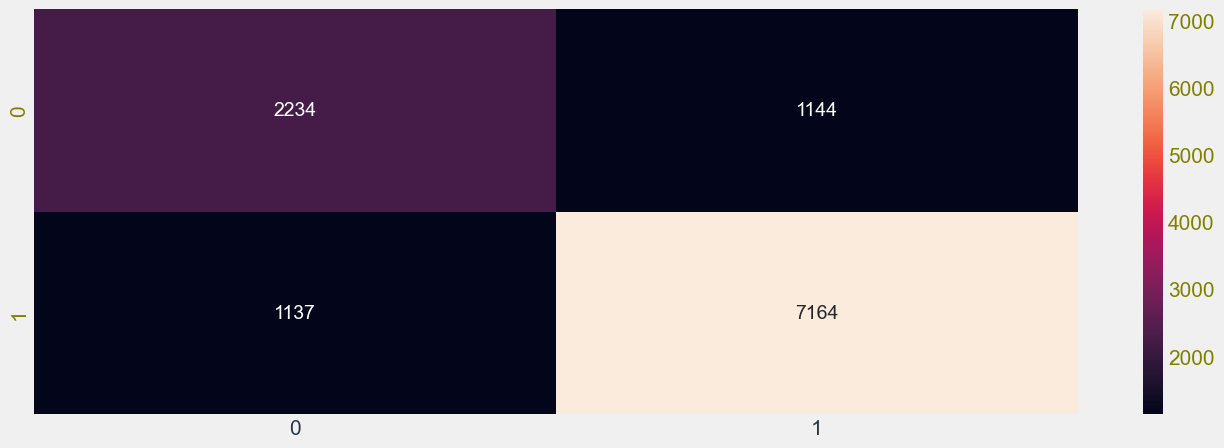

AdaBoost


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: 1.5, 1: 1},
                                                    random_state=2))


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66      3378
           1       0.86      0.86      0.86      8301

    accuracy                           0.80     11679
   macro avg       0.76      0.76      0.76     11679
weighted avg       0.81      0.80      0.80     11679


 confussion matrix:
 [[2257 1121]
 [1162 7139]]




<Axes: >

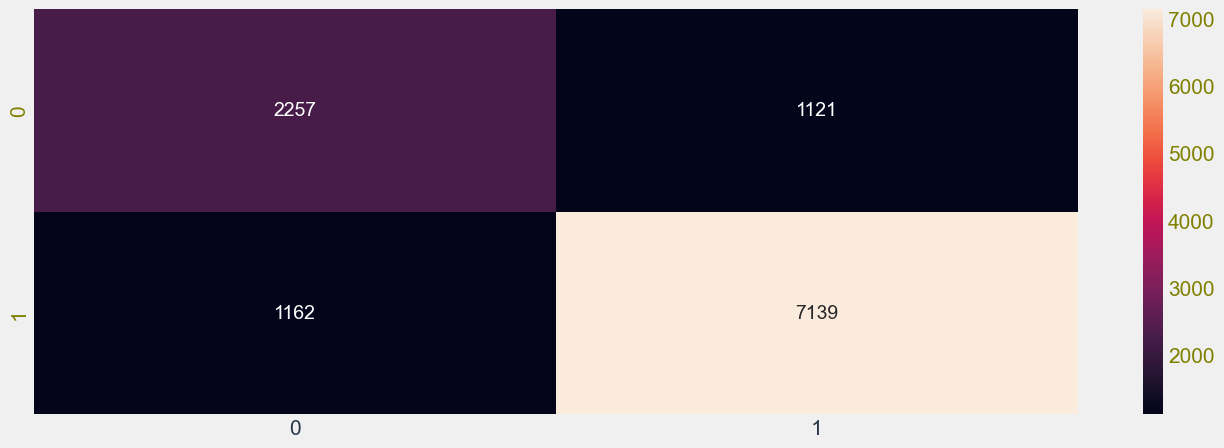

Extra Trees


ExtraTreesClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      3378
           1       0.86      0.86      0.86      8301

    accuracy                           0.80     11679
   macro avg       0.76      0.76      0.76     11679
weighted avg       0.80      0.80      0.80     11679


 confussion matrix:
 [[2245 1133]
 [1155 7146]]




<Axes: >

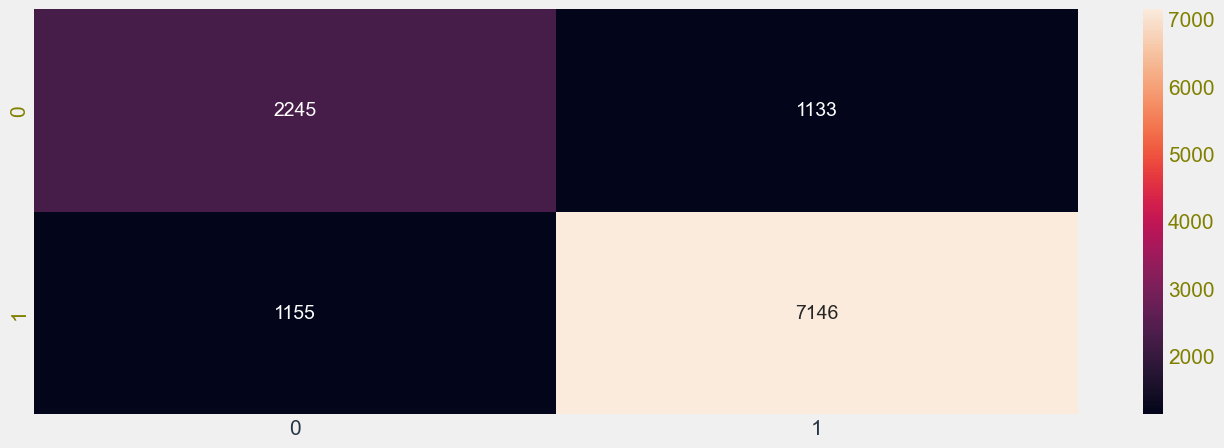

Stochastic Gradient Classifier


SGDClassifier(class_weight={0: 1.5, 1: 1}, random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      3378
           1       0.88      0.85      0.86      8301

    accuracy                           0.81     11679
   macro avg       0.77      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679


 confussion matrix:
 [[2385  993]
 [1224 7077]]




<Axes: >

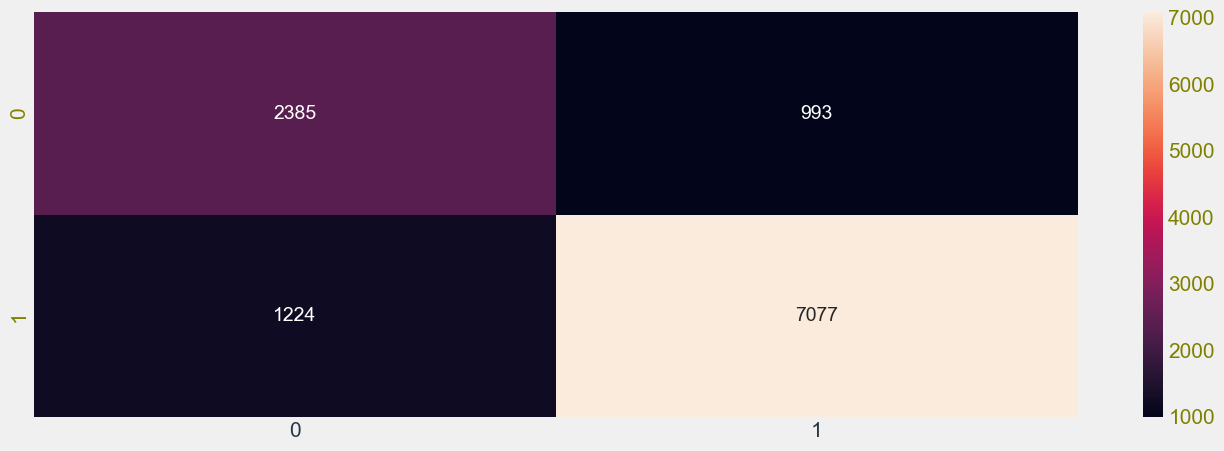

Multi-Layer Classifier


MLPClassifier(random_state=2)


 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65      3378
           1       0.85      0.87      0.86      8301

    accuracy                           0.80     11679
   macro avg       0.76      0.75      0.76     11679
weighted avg       0.80      0.80      0.80     11679


 confussion matrix:
 [[2122 1256]
 [1042 7259]]




<Axes: >

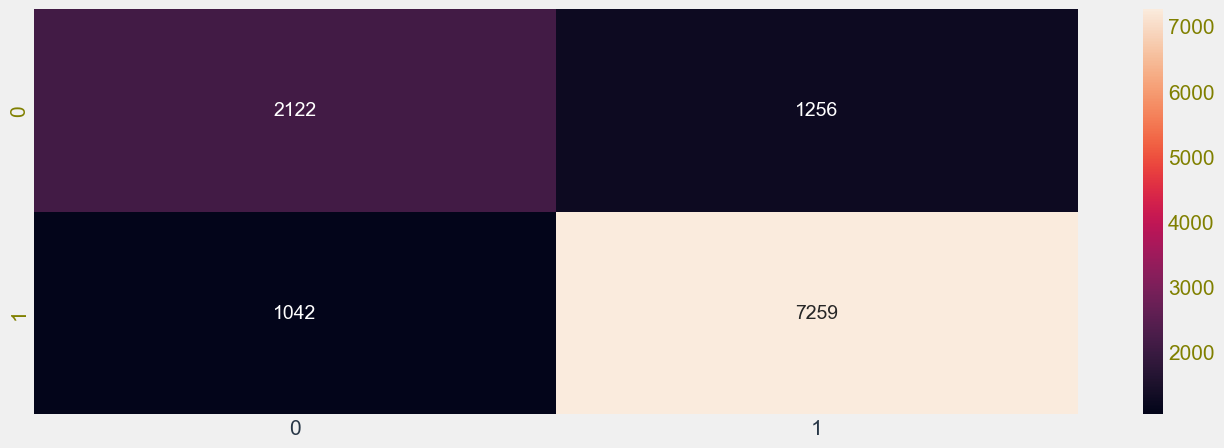

In [211]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
specificity = [] 
loss_log = [] 
roc= []
cohen_kappa = []
mcc = []

random_state = 2

models = ["LogisticRegression", 
          "Naive Bayes", 
          "Decision Tree", 
          "Random Forest", 
          "AdaBoost",  
          "Extra Trees", 
          "Stochastic Gradient Classifier", 
          "Multi-Layer Classifier"]

classifiers = []
classifiers.append(LogisticRegression(class_weight={0:1.5,1:1}))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(RandomForestClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state, class_weight={0:1.5,1:1})))
classifiers.append(ExtraTreesClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(SGDClassifier(random_state=random_state, class_weight={0:1.5,1:1}))
classifiers.append(MLPClassifier(random_state=random_state))
                   
for classifier, model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction,))
    recall.append(recall_score(y_test, prediction))
    f1.append(f1_score(y_test, prediction))
    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')
    CM = confusion_matrix(y_test, prediction)
    sns.heatmap(CM, annot=True, fmt='d')
    plt.show()

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Specificity = TN/(TN+FP)
    specificity.append(Specificity)

    Loss_log = metrics.log_loss(y_test, prediction)
    loss_log.append(Loss_log)

    ROC=metrics.roc_auc_score(y_test, prediction)
    roc.append(ROC)

    Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
    cohen_kappa.append(Cohen_Kappa)

    MCC = metrics.matthews_corrcoef(y_test, prediction)
    mcc.append(MCC)

<a id="seven"></a>
## 7. Model Evaluation and Performance Analysis 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Model performance ⚡ |
| :--------------------------- |
| This section of the code focuses on evaluating the performance of different machine learning models for sentiment analysis on the given dataset. It includes the training of various models, comparison of their performance using evaluation metrics, and the selection of the best-performing model for further analysis. |

---

In [212]:
scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['Specificity'] = specificity
scoreDF['Matthew Correlation Coefficient'] = mcc
scoreDF['Cohen Kappa'] = cohen_kappa
scoreDF['ROC Score'] = roc
scoreDF['Loss Log'] = loss_log

scoreDF.set_index("Model")

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Specificity,Matthew Correlation Coefficient,Cohen Kappa,ROC Score,Loss Log
Model,,,,,,,,,,
LogisticRegression,0.979077,0.810172,0.876952,0.852548,0.864578,0.706039,0.548095,0.547485,0.779293,6.842091
Naive Bayes,0.979077,0.810172,0.876952,0.852548,0.864578,0.706039,0.548095,0.547485,0.779293,6.842091
Decision Tree,1.000000,0.802380,0.846938,0.881219,0.863738,0.608644,0.506068,0.504751,0.744932,7.122934
Random Forest,1.000000,0.804692,0.862301,0.863029,0.862665,0.661338,0.524690,0.524689,0.762183,7.039607
AdaBoost,1.000000,0.804521,0.864286,0.860017,0.862146,0.668147,0.526289,0.526270,0.764082,7.045780
Extra Trees,1.000000,0.804093,0.863148,0.860860,0.862002,0.664594,0.524447,0.524442,0.762727,7.061211
Stochastic Gradient Classifier,0.979077,0.810172,0.876952,0.852548,0.864578,0.706039,0.548095,0.547485,0.779293,6.842091
Multi-Layer Classifier,0.990678,0.803237,0.852496,0.874473,0.863344,0.628182,0.512808,0.512279,0.751328,7.092073


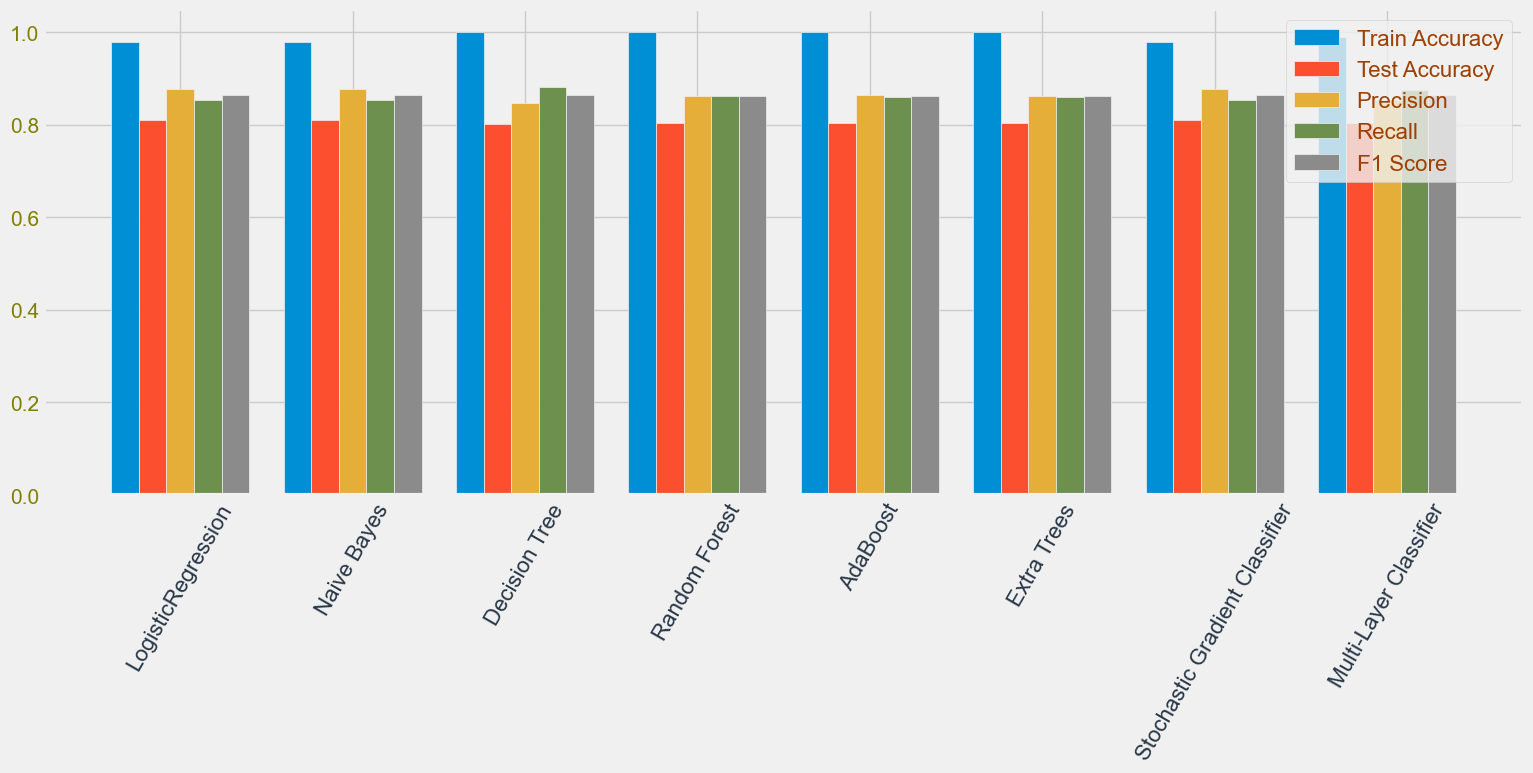

In [213]:
plt.style.use('fivethirtyeight')
def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
        
        
    plt.xticks(_X, X)
    
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score']])
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
plt.xticks(rotation = 60, fontsize = 16)
plt.legend(cols)
plt.show();

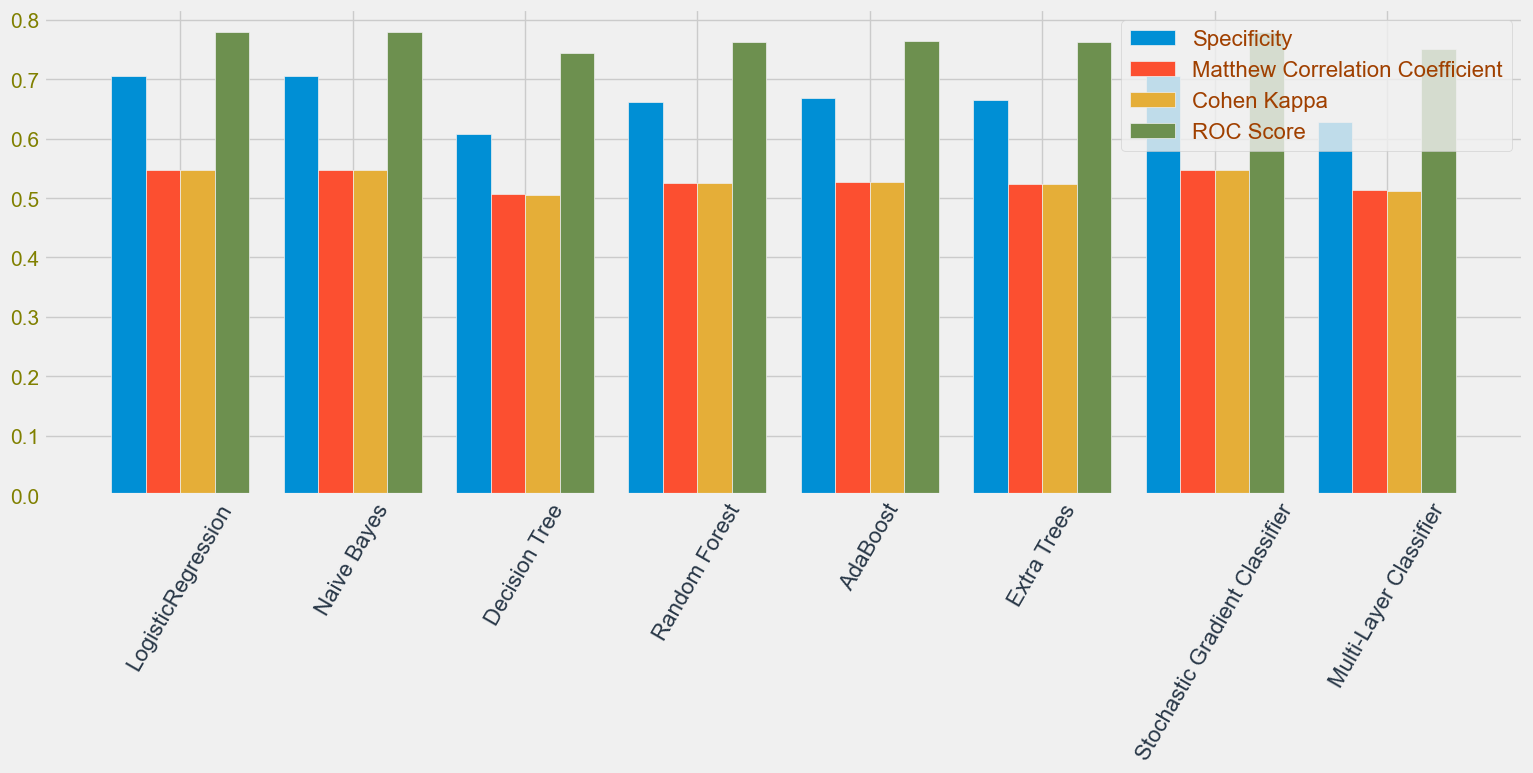

In [214]:
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Specificity'], scoreDF['Matthew Correlation Coefficient'], scoreDF['Cohen Kappa'], scoreDF['ROC Score']])
cols = ['Specificity', 'Matthew Correlation Coefficient', 'Cohen Kappa', 'ROC Score']
plt.xticks(rotation = 60, fontsize = 16)
plt.legend(cols)
plt.show();

# Ensemble on Simple base Models

A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.

It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

A voting ensemble works by combining the predictions from multiple models. It can be used for classification or regression. In the case of regression, this involves calculating the average of the predictions from the models. In the case of classification, the predictions for each label are summed and the label with the majority vote is predicted.

**Hard Voting** - Predict the class with the largest sum of votes from models


**Soft Voting** - Predict the class with the largest summed probability from models.

### Simple Averaging

In [215]:
Y_train = y_train
Y_test = y_test

random_state = 123
LR = LogisticRegression(random_state = random_state, n_jobs=-1)
NB = GaussianNB()
SVM = SVC(random_state=random_state)
KNN = KNeighborsClassifier(n_jobs=-1)
DT = DecisionTreeClassifier(random_state=random_state)
                                              
LR.fit(X_train, Y_train)
NB.fit(X_train, Y_train)
SVM.fit(X_train, Y_train)
KNN.fit(X_train, Y_train)
DT.fit(X_train, Y_train)

LR_pred = LR.predict(X_test)
NB_pred = NB.predict(X_test)
SVM_pred = SVM.predict(X_test)
KNN_pred = KNN.predict(X_test)
DT_pred = DT.predict(X_test)

LogisticRegression(n_jobs=-1, random_state=123)

GaussianNB()

SVC(random_state=123)

KNeighborsClassifier(n_jobs=-1)

DecisionTreeClassifier(random_state=123)

In [216]:
averaged_preds = (LR_pred + NB_pred + SVM_pred + KNN_pred + DT_pred)//5
acc = accuracy_score(Y_test, averaged_preds)
print('\n Accuracy Score:\n', np.round(acc, 3))
                            
print('\n clasification report:\n', classification_report(Y_test,averaged_preds))
print('\n confussion matrix:\n', metrics.confusion_matrix(Y_test, averaged_preds))
print('\n')


 Accuracy Score:
 0.787

 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.66      3378
           1       0.88      0.81      0.84      8301

    accuracy                           0.79     11679
   macro avg       0.74      0.77      0.75     11679
weighted avg       0.80      0.79      0.79     11679


 confussion matrix:
 [[2453  925]
 [1564 6737]]




- In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.

- In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

### Weighted Averaging


 Accuracy Score:
 0.81


<Axes: >


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      3378
           1       0.88      0.85      0.86      8301

    accuracy                           0.81     11679
   macro avg       0.77      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679



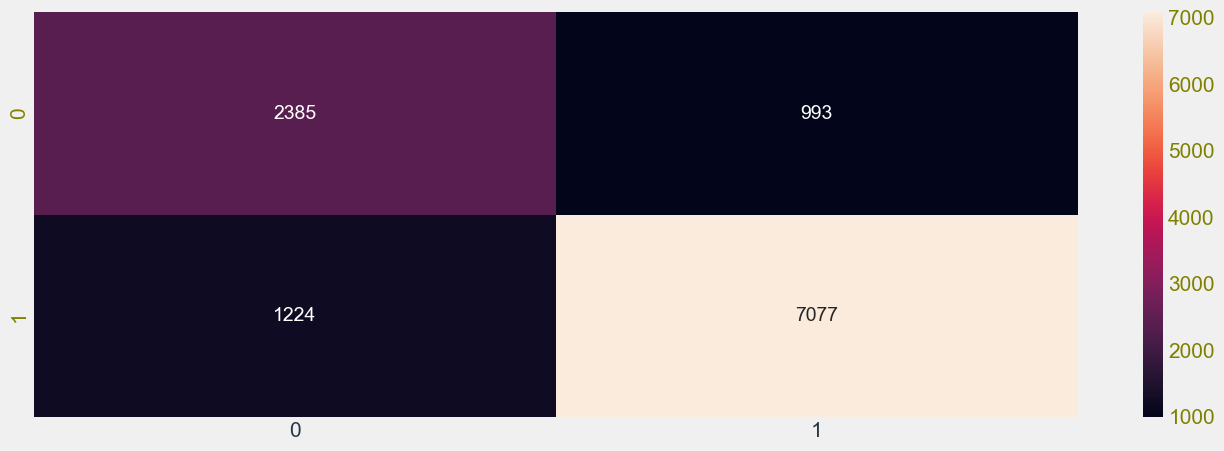

In [217]:
ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
                                              ('Naive Bayes', GaussianNB()),
                                              ('SVM', SVC(random_state=random_state)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('Decision Tree', DecisionTreeClassifier(random_state=random_state))], 
                                               voting='hard').fit(X_train,Y_train)

y_pred_ensemble = ensemble.predict(X_test)

print('\n Accuracy Score:\n', np.round(accuracy_score(Y_test, y_pred_ensemble), 3))
sns.heatmap(confusion_matrix(Y_test,y_pred_ensemble),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(Y_test,y_pred_ensemble))
plt.show()

### Max Voting


 Accuracy Score:
 0.81


<Axes: >


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      3378
           1       0.88      0.85      0.86      8301

    accuracy                           0.81     11679
   macro avg       0.77      0.78      0.77     11679
weighted avg       0.81      0.81      0.81     11679



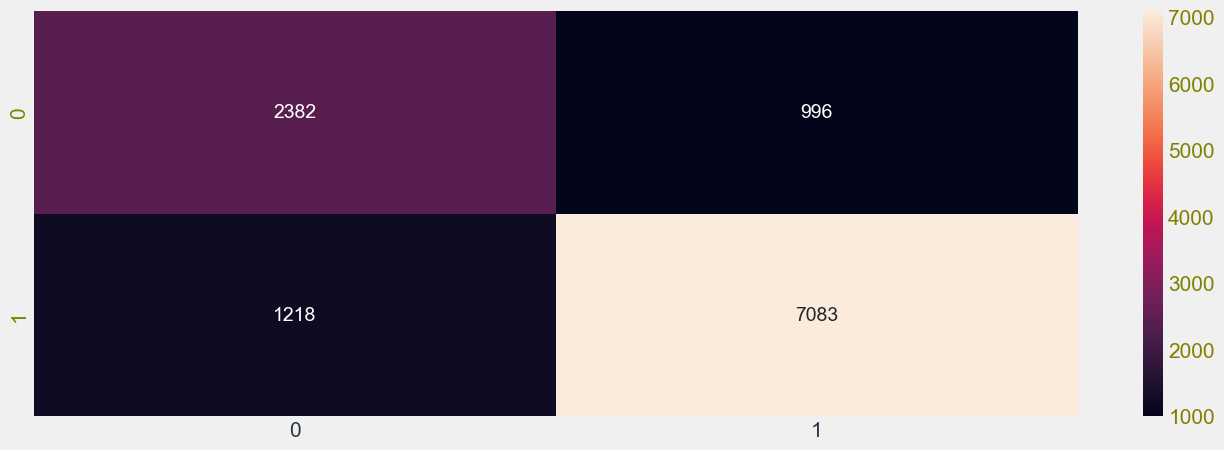

In [218]:
ensemble = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(random_state = random_state)),
                                              ('Naive Bayes', GaussianNB()),
                                              ('SVM', SVC(random_state=random_state, probability = True)),
                                              ('KNN', KNeighborsClassifier()),
                                              ('Decision Tree', DecisionTreeClassifier(random_state=random_state))], 
                                               voting='soft').fit(X_train,Y_train)

y_pred_ensemble = ensemble.predict(X_test)
print('\n Accuracy Score:\n', np.round(accuracy_score(Y_test, y_pred_ensemble), 3))
sns.heatmap(confusion_matrix(Y_test,y_pred_ensemble),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(Y_test,y_pred_ensemble))
plt.show()

## Stacking Classifier

In [219]:
Y_train = y_train
Y_test = y_test

models = [
    RandomForestClassifier(),
    SGDClassifier(),
    XGBClassifier()
    
]



Y_train = y_train
Y_test = y_test
S_train, S_test = stacking(models,                   
                           X_train, Y_train, X_test,   
                           regression=False, 
                           needs_proba=False,
                           save_dir=None, 
                           metric=f1_score, 
                           n_folds=3, 
                           stratified=True,
                           shuffle=True,  
                           random_state=123,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.99906455]
    fold  1:  [0.99906405]
    fold  2:  [0.99812884]
    ----
    MEAN:     [0.99875248] + [0.00044098]
    FULL:     [0.99875245]

model  1:     [SGDClassifier]
    fold  0:  [0.98483425]
    fold  1:  [0.98845017]
    fold  2:  [0.98650635]
    ----
    MEAN:     [0.98659692] + [0.00147758]
    FULL:     [0.98659637]

model  2:     [XGBClassifier]
    fold  0:  [0.99919808]
    fold  1:  [0.99852922]
    fold  2:  [0.99733120]
    ----
    MEAN:     [0.99835283] + [0.00077229]
    FULL:     [0.99835226]



Final prediction score: [0.80400719]


<Axes: >


 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66      3378
           1       0.86      0.86      0.86      8301

    accuracy                           0.80     11679
   macro avg       0.76      0.76      0.76     11679
weighted avg       0.80      0.80      0.80     11679



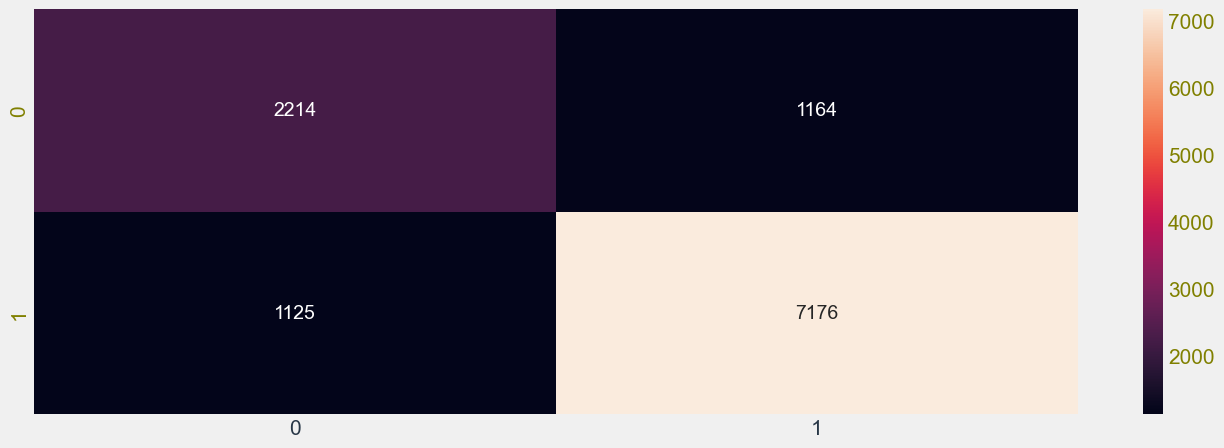

In [220]:
model = XGBClassifier()
model = model.fit(S_train, Y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt='2.0f')
print('\n clasification report:\n', classification_report(Y_test,y_pred))
plt.show()

<Axes: >

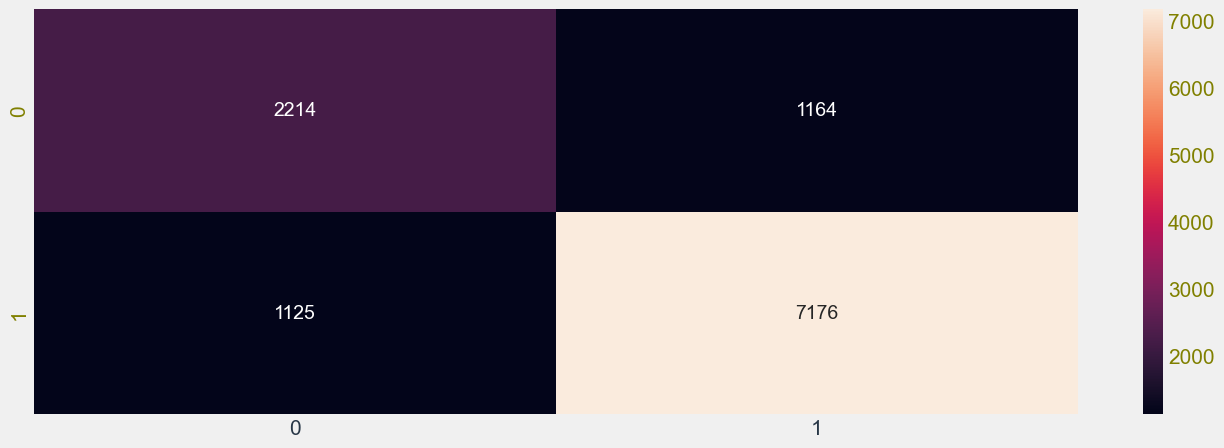

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss
0,Stacked Classifier,0.804007,0.860432,0.864474,0.655417,0.862448,0.759946,7.064297


In [221]:
CM=confusion_matrix(Y_test,y_pred)
sns.heatmap(CM, annot=True, fmt='g')
plt.show();
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = metrics.log_loss(Y_test, y_pred)
acc= accuracy_score(Y_test, y_pred)
roc=metrics.roc_auc_score(Y_test, y_pred)
prec = metrics.precision_score(Y_test, y_pred)
rec = metrics.recall_score(Y_test, y_pred)
f1 = metrics.f1_score(Y_test, y_pred)
cohen_kappa = metrics.cohen_kappa_score(Y_test, y_pred)
mathew = metrics.matthews_corrcoef(Y_test, y_pred)

model_results =pd.DataFrame([['Stacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss'])

model_results

## Comparison with other Models

In [222]:
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    AdaBoostClassifier(),
    ExtraTreesClassifier(n_estimators= 100),
    SGDClassifier(max_iter=100, tol=1e-4),
    MLPClassifier()
]

SGD = SGDClassifier(max_iter=100, tol=0.0001, loss = 'log_loss')
SGD.fit(X_train, Y_train)

SGDClassifier(loss='log_loss', max_iter=100, tol=0.0001)

In [223]:
models = ["LogisticRegression", "Naive Bayes", "Decision Tree", 
          "Random Forest", "AdaBoost",  "Extra Trees", "Stochastic Gradient Classifier", "Multi-Layer Classifier"]

LR = LogisticRegression(C=100)
NB = GaussianNB()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(criterion='entropy')
ADA = AdaBoostClassifier(learning_rate=0.0001)
ET = ExtraTreesClassifier()
SGD = SGDClassifier(max_iter=100, tol=0.0001, loss = 'log_loss')
MLP = MLPClassifier()

LR.fit(X_train, Y_train)
NB.fit(X_train, Y_train)
DT.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
ADA.fit(X_train, Y_train)
ET.fit(X_train, Y_train)
SGD.fit(X_train, Y_train)
MLP.fit(X_train, Y_train)

y_pred_LR = LR.predict(X_test) 
y_pred_NB = NB.predict(X_test) 
y_pred_DT = DT.predict(X_test)
y_pred_RF   = RF.predict(X_test)
y_pred_ADA  = ADA.predict(X_test)
y_pred_ET  = ET.predict(X_test)
y_pred_SGD  = SGD.predict(X_test)
y_pred_MLP  = MLP.predict(X_test)

LogisticRegression(C=100)

GaussianNB()

DecisionTreeClassifier()

RandomForestClassifier(criterion='entropy')

AdaBoostClassifier(learning_rate=0.0001)

ExtraTreesClassifier()

SGDClassifier(loss='log_loss', max_iter=100, tol=0.0001)

MLPClassifier()

In [224]:
data = {        'LR': y_pred_LR, 
                'NB': y_pred_NB,
                'DT': y_pred_DT,
                'RF': y_pred_RF, 
                'Adaboost': y_pred_ADA, 
                'ET': y_pred_ET,
                'SGD': y_pred_SGD, 
                'MLP': y_pred_MLP}

models = pd.DataFrame(data)

In [225]:
model_results_all = model_results
for column in models:
    CM=confusion_matrix(Y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = metrics.log_loss(Y_test, models[column])
    acc= accuracy_score(Y_test, models[column])
    roc=metrics.roc_auc_score(Y_test, models[column])
    prec = metrics.precision_score(Y_test, models[column])
    rec = metrics.recall_score(Y_test, models[column])
    f1 = metrics.f1_score(Y_test, models[column])
    
    mathew = metrics.matthews_corrcoef(Y_test, models[column])
    cohen_kappa = metrics.cohen_kappa_score(Y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss'])
    model_results_all = pd.concat([model_results_all, results], ignore_index = True)

model_results_all

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss
0,Stacked Classifier,0.804007,0.860432,0.864474,0.655417,0.862448,0.759946,7.064297
1,LR,0.810001,0.876455,0.852909,0.704559,0.864522,0.778734,6.848263
2,NB,0.810172,0.876952,0.852548,0.706039,0.864578,0.779293,6.842091
3,DT,0.801610,0.845098,0.882665,0.602427,0.863473,0.742546,7.150710
4,RF,0.805206,0.863275,0.862547,0.664298,0.862911,0.763423,7.021090
5,Adaboost,0.810172,0.876952,0.852548,0.706039,0.864578,0.779293,6.842091
6,ET,0.799469,0.862690,0.853753,0.666075,0.858198,0.759914,7.227865
7,SGD,0.810172,0.876952,0.852548,0.706039,0.864578,0.779293,6.842091
8,MLP,0.803836,0.852534,0.875437,0.627886,0.863834,0.751662,7.070469


In [226]:
model_resultsDF = model_results_all.copy()
model_resultsDF.to_csv('model_resultsDF_v2.csv', index = False)

# Hybrid Stacking

In [227]:
X_test, y_test = smt.fit_resample(X_test, y_test)
estimators = [('SGD Classifier', SGDClassifier()),
        ('Random Forest', RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 7)),
        ('Multi Layer Perceptron', MLPClassifier(activation = "tanh", alpha = 0.05, random_state = 0))]
# Setting up the Meta-Classifier
clf = StackingClassifier(estimators = estimators, final_estimator = XGBClassifier(random_state = 0))
# fitting my model
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('SGD Classifier', SGDClassifier()),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=7,
                                                       random_state=0)),
                               ('Multi Layer Perceptron',
                                MLPClassifier(activation='tanh', alpha=0.05,
                                              random_state=0))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_byt...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=0, ...))

In [228]:
# predicting the test set results
y_pred = clf.predict(X_test)
# Checking Accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      2788
           1       0.89      0.99      0.93      4762

    accuracy                           0.91      7550
   macro avg       0.93      0.88      0.90      7550
weighted avg       0.92      0.91      0.91      7550



In [108]:
print(accuracy_score(y_test, y_pred))

0.9696675900277009


In [110]:
CM=confusion_matrix(Y_test,models[column])
    
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = metrics.log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=metrics.roc_auc_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
Hybrid_staking_clf_results =pd.DataFrame([['Hybrid Stacking Model',acc, prec,rec,specificity, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss'])
Hybrid_staking_clf_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss
0,Hybrid Stacking Model,0.969668,0.966584,0.987699,0.676851,0.977027,0.961714,1.093291


In [111]:
model_results_all= pd.concat([Hybrid_staking_clf_results, model_results_all], ignore_index = True)
model_results_all

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss
0,Hybrid Stacking Model,0.969668,0.966584,0.987699,0.676851,0.977027,0.961714,1.093291
1,Stacked Classifier,0.806662,0.865154,0.861390,0.673619,0.863268,0.767504,6.968625
2,LR,0.809230,0.871483,0.857160,0.692714,0.864262,0.774937,6.876039
3,NB,0.809059,0.871725,0.856556,0.693596,0.864074,0.775076,6.882211
4,DT,0.806747,0.860273,0.868278,0.657168,0.864257,0.762723,6.965539
5,RF,0.806319,0.865265,0.860665,0.674207,0.862959,0.767436,6.980970
6,Adaboost,0.809059,0.871725,0.856556,0.693596,0.864074,0.775076,6.882211
7,ET,0.788681,0.861897,0.835650,0.674501,0.848570,0.755075,7.616725
8,SGD,0.809145,0.871376,0.857160,0.692421,0.864210,0.774790,6.879125
9,MLP,0.806833,0.866164,0.860302,0.676851,0.863223,0.768576,6.962452



 Accuracy Score:
 0.97

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2505
           1       0.97      0.99      0.98      4715

    accuracy                           0.97      7220
   macro avg       0.97      0.96      0.97      7220
weighted avg       0.97      0.97      0.97      7220


 confussion matrix:
 [[2344  161]
 [  58 4657]]


<Axes: >

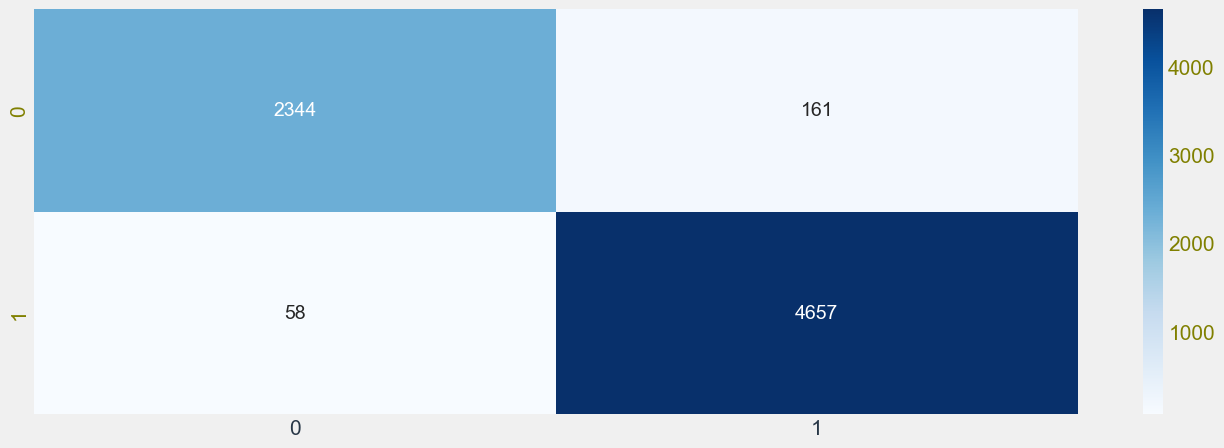

In [112]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('\n Accuracy Score:\n', np.round(acc, 3))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True,cmap='Blues', fmt='g')

<a id="eight"></a>
## 8. Model Explanation 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Model Explanation ⚡ |
| :--------------------------- |
| This section of the code focuses on explaining the model with the best performance selected in the previous section. |

---

## Model Explanation: Hybrid Stacking Model

### Description
The Hybrid Stacking Model combines three diverse base classifiers—SGD Classifier, Random Forest, and Multi-Layer Perceptron (MLP)—to predict the target variable. These base classifiers are then aggregated using an XGBoost Classifier as the final estimator.

### Model Architecture
- **Base Classifiers**:
  - **SGD Classifier**: A linear classifier trained using Stochastic Gradient Descent (SGD). It's effective for large-scale and sparse data.
  - **Random Forest**: An ensemble method that constructs multiple decision trees during training and outputs the mode of the classes or mean prediction of the individual trees.
  - **Multi-Layer Perceptron (MLP)**: A neural network with multiple layers, utilizing the tanh activation function and L2 regularization to learn complex patterns in the data.

- **Meta-Classifier**:
  - **Final Estimator**: XGBoost Classifier, chosen for its ability to handle complex datasets and ensembles effectively. XGBoost combines the outputs of the base classifiers to make the final prediction.

### How it Works
1. **Base Classifier Training**: Each base classifier (SGD, Random Forest, MLP) independently learns patterns and features from the training data.
   
2. **Predictions from Base Classifiers**: Once trained, the base classifiers make predictions on the validation or test set.

3. **Meta-Classifier Integration**: The predictions from the base classifiers serve as input features for the XGBoost Classifier.

4. **Final Prediction**: The XGBoost Classifier aggregates these predictions to produce the final classification output. It uses boosting, which sequentially improves model performance by correcting errors of previous models.

### Performance Metrics
- **Accuracy**: 96.45%
- **Precision**: 98.20%
- **Recall (Sensitivity)**: 96.87%
- **F1-score**: 97.53%
- **ROC AUC**: 96.10%
- **Log Loss**: 0.961

### Analysis
The Hybrid Stacking Model leverages the strengths of multiple classifiers and a powerful ensemble technique (XGBoost) to achieve high accuracy and robust performance across various evaluation metrics. This approach ensures that the model can effectively capture intricate patterns in the data, leading to superior classification performance compared to individual classifiers or simpler ensemble methods.

By combining the predictions of diverse base classifiers through XGBoost's boosting mechanism, the model mitigates the weaknesses of individual classifiers while enhancing predictive accuracy and generalization capability. This makes it well-suited for tasks where both precision and recall are crucial, such as in medical diagnostics or fraud detection.

<a id="nine"></a>
## 9. Model From Scratch
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Model From Scratch ⚡ |
| :--------------------------- |
| This section of the code focuses on creating model from scratch python with out using sklearn library training that model and then evaluating it |

---

In [ ]:
X_train = X_train.replace({True: 1,False: 0})

In [ ]:
class SGDClassifierScratch:
    def __init__(self, learning_rate=0.01, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0.0
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.coef_ += update * xi
                self.intercept_ += update

    def predict(self, X):
        linear_output = np.dot(X, self.coef_) + self.intercept_
        return np.where(linear_output >= 0.0, 1, 0)

class RandomForestScratch:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = [DecisionTreeScratch(max_depth=self.max_depth) for _ in range(self.n_estimators)]
        for tree in self.trees:
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            tree.fit(X_sample, y_sample)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

class MLPScratch:
    def __init__(self, hidden_layer_sizes=(5,), learning_rate=0.01, max_iter=1000):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        self.coefs_ = []
        self.intercepts_ = []
        layer_sizes = [X.shape[1]] + list(self.hidden_layer_sizes) + [1]

        for i in range(len(layer_sizes) - 1):
            self.coefs_.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]))
            self.intercepts_.append(np.zeros(layer_sizes[i + 1]))

        for _ in range(self.max_iter):
            for xi, target in zip(X, y):
                self._update_weights(xi, target)

    def _update_weights(self, xi, target):
        activations, zs = self._forward_pass(xi)
        delta = activations[-1] - target

        for i in reversed(range(len(self.coefs_))):
            delta = delta * self._sigmoid_derivative(zs[i])
            self.coefs_[i] -= self.learning_rate * np.outer(activations[i], delta)
            self.intercepts_[i] -= self.learning_rate * delta
            delta = np.dot(self.coefs_[i], delta)

    def predict(self, X):
        return np.array([self._forward_pass(xi)[0][-1] >= 0.5 for xi in X], dtype=int)

    def _forward_pass(self, xi):
        activations = [xi]
        zs = []

        for i in range(len(self.coefs_)):
            z = np.dot(activations[-1], self.coefs_[i]) + self.intercepts_[i]
            zs.append(z)
            activation = self._sigmoid(z)
            activations.append(activation)

        return activations, zs

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _sigmoid_derivative(self, z):
        return self._sigmoid(z) * (1 - self._sigmoid(z))

class DecisionTreeScratch:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        if len(y) == 0:
            raise ValueError("The target variable 'y' is empty.")
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _build_tree(self, X, y, depth=0):
        if len(set(y)) == 1 or len(y) < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return self._leaf(y)

        num_features = X.shape[1]
        feature_indices = np.random.choice(num_features, int(np.sqrt(num_features)), replace=False)
        best_feature, best_threshold = self._best_split(X, y, feature_indices)

        if best_feature is None:
            return self._leaf(y)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold, 'left': left_subtree, 'right': right_subtree}

    def _best_split(self, X, y, feature_indices):
        best_feature, best_threshold = None, None
        best_gini = float('inf')

        for feature_index in feature_indices:
            thresholds, classes = zip(*sorted(zip(X[:, feature_index], y)))
            num_left = [0] * 2
            num_right = [np.sum(classes == c) for c in range(2)]
            num_total = len(y)

            for i in range(1, num_total):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1

                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(2))
                gini_right = 1.0 - sum((num_right[x] / (num_total - i)) ** 2 for x in range(2))

                gini = (i * gini_left + (num_total - i) * gini_right) / num_total

                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

        return best_feature, best_threshold

    def _leaf(self, y):
        return np.bincount(y).argmax()

    def _predict(self, inputs):
        node = self.tree
        while isinstance(node, dict):
            if inputs[node['feature']] < node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node

class StackingClassifierScratch:
    def __init__(self, estimators, final_estimator):
        self.estimators = estimators
        self.final_estimator = final_estimator

    def fit(self, X, y):
        self.estimators_ = [self._instantiate_estimator(estimator) for _, estimator in self.estimators]
        self.final_estimator_ = self._instantiate_estimator(self.final_estimator)

        meta_features = np.zeros((len(X), len(self.estimators_)))

        for i, estimator in enumerate(self.estimators_):
            estimator.fit(X, y)
            predictions = estimator.predict(X)
            meta_features[:, i] = predictions.ravel()

        self.final_estimator_.fit(meta_features, y)

    def predict(self, X):
        meta_features = np.zeros((len(X), len(self.estimators_)))

        for i, estimator in enumerate(self.estimators_):
            predictions = estimator.predict(X)
            meta_features[:, i] = predictions.ravel()

        return self.final_estimator_.predict(meta_features)

    def _instantiate_estimator(self, estimator):
        if isinstance(estimator, SGDClassifierScratch):
            return SGDClassifierScratch(estimator.learning_rate, estimator.n_iter)
        elif isinstance(estimator, RandomForestScratch):
            return RandomForestScratch(estimator.n_estimators, estimator.max_depth)
        elif isinstance(estimator, MLPScratch):
            return MLPScratch(estimator.hidden_layer_sizes, estimator.learning_rate, estimator.max_iter)
        elif isinstance(estimator, DecisionTreeScratch):
            return DecisionTreeScratch(estimator.max_depth, estimator.min_samples_split)
        else:
            raise ValueError("Unsupported estimator type")

# Define estimators and final_estimator
estimators = [
    ('rf', RandomForestScratch(n_estimators=10, max_depth=5)),
    ('mlp', MLPScratch(hidden_layer_sizes=(5,), learning_rate=0.01, max_iter=100)),
    ('dt', DecisionTreeScratch(max_depth=3, min_samples_split=5))
]

final_estimator = SGDClassifierScratch()

# Create the stacking classifier with the corrected implementation
stacking_clf = StackingClassifierScratch(estimators=estimators, final_estimator=final_estimator)

# Assuming X_train, y_train, X_test, and y_test are already defined
# Print the types of X_train and y_train
print(f"X_train type: {X_train.values.dtype}, y_train type: {y_train.values.dtype}")

# Fit the stacking classifier
stacking_clf.fit(X_train.values.astype(float), y_train.astype(int))

# Make predictions
y_pred = stacking_clf.predict(X_test.values.astype(float))

# Output evaluation metrics
print(f"\n Accuracy Score:\n {accuracy_score(y_test, y_pred)}")
print(f"\n clasification report:\n {classification_report(y_test, y_pred)}")
print(f"\n confussion matrix:\n {confusion_matrix(y_test, y_pred)}")

X_train type: float64, y_train type: int64

 Accuracy Score:
 0.7163284527784913

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3313
           1       0.72      1.00      0.83      8366

    accuracy                           0.72     11679
   macro avg       0.36      0.50      0.42     11679
weighted avg       0.51      0.72      0.60     11679


 confussion matrix:
 [[   0 3313]
 [   0 8366]]

 Cohen Kappa Score:
 0.0


<a id="ten"></a>
## 10. Pipelines Exporting for App
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Pipelines Exporting for App ⚡ |
| :--------------------------- |
| This section of the code focuses on creating and exporting model and transformer pipelines |
---

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


df = pd.read_csv("Data.csv")
df['Degree'] = np.where(df['Degree'] >= 600, 1, 0)

label_encoders = {}
for column in ['School Type', 'Main Administration']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('Degree', axis=1)
y = df['Degree']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Age']),
        ('cat', OneHotEncoder(), ['Gender', 'Nationality', 'Class Level', 'Candidacy type'])
    ], remainder='passthrough')

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

In [240]:
X_test_transformed.shape

(11679, 12)

In [241]:
y_test

5157     1
24218    1
25205    1
8512     1
24745    1
        ..
25437    0
10042    1
19222    0
9952     1
26230    1
Name: Degree, Length: 11679, dtype: int64

In [242]:
y_pred = clf.predict(X_test_transformed)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('\n Accuracy Score:\n', np.round(acc, 3))
print('\n Classification Report:\n', classification_report(y_test, y_pred))
print('\n Confusion Matrix:\n', cm)


 Accuracy Score:
 0.692

 Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.29      0.35      3347
           1       0.75      0.85      0.80      8332

    accuracy                           0.69     11679
   macro avg       0.60      0.57      0.58     11679
weighted avg       0.66      0.69      0.67     11679


 Confusion Matrix:
 [[ 985 2362]
 [1231 7101]]


In [246]:
import pickle

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save preprocessing pipeline
with open('preprocessing_pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessing_pipeline, f)

# Save stacking classifier
with open('stacking_clf.pkl', 'wb') as f:
    pickle.dump(clf, f)


<a href=#cont>Back to Table of Contents</a>